In [3]:
import tensorflow as tf
from d2l import tensorflow as d2l
import numpy as np

In [49]:
# Scratch implementation of drop out layer

def create_dropout(X,dropout):
  assert 0 <= dropout <= 1
  if (dropout == 0):
    return X
  if (dropout == 1):
    return tf.zeros_like(X)
  
  mask= tf.random.uniform(shape=tf.shape(X), minval=0, maxval=1) < 1-dropout
  return tf.cast(mask, dtype=tf.float32) * X / (1.0 - dropout) 

In [50]:
X = tf.reshape(tf.range(16, dtype=tf.float32), (2, 8))

In [51]:
# Defining Model Parameters
num_outputs,num_hidden1,num_hidden2 = 10,256,256

# Defining the Model
dropout1, dropout2 = 0.2,0.5
class Model(tf.keras.Model):
  def __init__(self,num_outputs,num_hidden1,num_hidden2):
    super().__init__()
    self.input_layer = tf.keras.layers.Flatten()
    self.hidden1 = tf.keras.layers.Dense(num_hidden1, activation='relu')
    self.hidden2 = tf.keras.layers.Dense(num_hidden2, activation='relu')
    self.output_layer = tf.keras.layers.Dense(num_outputs)

  def call(self,input,training=None):
    X = self.input_layer(input)
    X = self.hidden1(X)
    if training:
      X = create_dropout(X,dropout1)
    X = self.hidden2(X)
    if training:
      X = create_dropout(X,dropout2)
    X = self.output_layer(X)
    return X

model = Model(num_outputs,num_hidden1,num_hidden2)


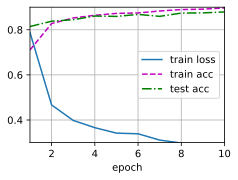

In [52]:
# Training and Testing

num_epochs, lr, batch_size = 10, 0.5, 256
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = tf.keras.optimizers.SGD(learning_rate=lr)
d2l.train_ch3(model, train_iter, test_iter, loss, num_epochs, trainer)

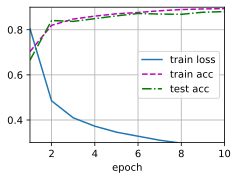

In [56]:
# Direct drop out implementation

model = tf.keras.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation=tf.nn.relu),
        tf.keras.layers.Dropout(dropout1),
        tf.keras.layers.Dense(256, activation=tf.nn.relu),
        tf.keras.layers.Dropout(dropout2),
        tf.keras.layers.Dense(10)])

optimizers = tf.keras.optimizers.SGD(learning_rate=lr)
d2l.train_ch3(model,train_iter,test_iter,loss,num_epochs,optimizer)